In [4]:
import numpy as np

In [12]:
def GF_table(bc_left: str, bc_right: str, L, truncation):
    # returns the eigenvalue beta_m and the norm Nx

    m = np.arange(1, truncation+1)
    if (bc_left == 'D' and bc_right == 'D'): #11
        beta_m = m*np.pi/L
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    
    if (bc_left == 'D' and bc_right == 'N'): #12
        beta_m = (2*m-1)*np.pi/(2*L)
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    
    if (bc_left == 'N' and bc_right == 'D'): #21
        beta_m = (2*m-1)*np.pi/(2*L)
        # X_m = np.sin(beta_m*x)
        Nx = L/2
        return beta_m, Nx
    

def GF_function(x, y, x_s, y_s, Lx, Ly, bc_e: str, bc_n: str, bc_w: str, bc_s: str, truncation = 50):
    # x = np.arange(0, Lx, step)
    # y = np.arange(0, Ly, step)
    beta_m, Nx = GF_table(bc_e, bc_w, Lx, truncation)
    theta_n, Ny = GF_table(bc_s, bc_n, Ly, truncation)
    summation_array = np.zeros(truncation*truncation)
    
    for m in range(1, truncation+1):
        i = m-1

        X_m = np.sin(x*beta_m[i])
        X_m_s = np.sin(x_s*beta_m[i])
        # print("X_m_s: " + str(X_m_s))
        for n in range(1, truncation+1):
            j= n-1

            Y_n = np.sin(y*theta_n[j])
            Y_n_s = np.sin(y_s*theta_n[j])
            # print("X_m_s: " + str(Y_n_s))

            fraction = 1/((beta_m[i]*beta_m[i]) + (theta_n[j]*theta_n[j]))
            X_mult = (X_m*X_m_s)/Nx
            Y_mult = (Y_n*Y_n_s)/Ny

            summation_array[i*truncation + j] = fraction * X_mult * Y_mult
    
    sum = np.sum(summation_array)
    return sum


def return_GF_matrix(x, y, Lx, Ly, bc_e: str, bc_n: str, bc_w: str, bc_s: str, n_step_s = 20):
    step_s_x = Lx/n_step_s
    step_s_y = Ly/n_step_s

    x_s = np.arange(0, Lx, step_s_x)
    x_s[-1] = Lx # just to make sure we arrive to the border
    y_s = np.arange(0, Ly, step_s_y)
    y_s[-1] = Ly

    GF_matrix = np.zeros((n_step_s, n_step_s))

    for i in range(n_step_s):
        for j in range(n_step_s):
            GF_matrix[i, j] = GF_function(x, y, x_s[i], y_s[j], Lx, Ly, bc_e=bc_e, bc_n=bc_n, bc_w=bc_w, bc_s=bc_s)

    return GF_matrix

In [6]:
Lx = Ly = 1
x_s = y_s = Lx/2
n_step = 2
step = 0.01 # limit might be after 0.01
# np.linspace(0, L/2, n_step, endpoint=True, retstep=False, dtype=None, axis=0)
# x_in = np.arange(0, L/2, step)
# x_out = np.arange(0, L/2, step)
# y_in = np.arange(0, L/2, step)
# y_out = np.arange(0, L/2, step)
x = np.arange(0, Lx, step)
y = np.arange(0, Ly, step)

GF_function(x[1], y[1], x_s, y_s, Lx, Ly, bc_e = "D", bc_n = "D", bc_w = "D", bc_s = "D")
# green_function(x, y, x_s, y_s, L, bc_e: str, bc_n: str, bc_w: str, bc_s: str, truncation = 10):

0.0001296981110708539

In [7]:
plot_GF = np.zeros((20, 20))
x = np.arange(0, Lx, 0.05)
y = np.arange(0, Ly, 0.05)
for i in range(20):
    for j in range(20):
        plot_GF[i, j] = GF_function(x[i], y[j], x_s, y_s, Lx, Ly, bc_e = "N", bc_n = "N", bc_w = "D", bc_s = "D")
        
    

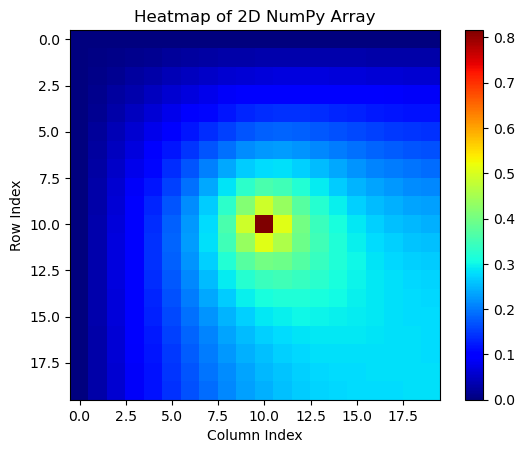

In [8]:
import matplotlib.pyplot as plt

# Plot the heatmap
plt.imshow(plot_GF, cmap='jet', interpolation='nearest')
plt.colorbar()  # Add a color bar to show the color scale
plt.title('Heatmap of 2D NumPy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [14]:
return_GF_matrix(0.2, 0.2, 1, 1, "D", "D", "D", "D")

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.00638889e-02,  3.94781266e-02,
         5.59512735e-02,  6.00209336e-02,  6.22591707e-02,
         5.24836717e-02,  4.09533433e-02,  3.08451340e-02,
         2.30886350e-02,  1.74485045e-02,  1.32939154e-02,
         1.01359779e-02,  7.74878637e-03,  5.96193255e-03,
         4.55095256e-03,  3.35661259e-03,  2.35177194e-03,
         1.51897322e-03, -1.16264410e-18],
       [ 0.00000000e+00,  3.94781266e-02,  8.10011868e-02,
         1.21258925e-01,  1.44012575e-01,  1.33114750e-01,
         1.05824243e-01,  7.96094523e-02,  5.92434569e-02,
         4.42897896e-02,  3.3

In [17]:
omega = 5
lambda_v = 1
Lx = Ly = 1
n_step_s = 20

x = 0.2
y = 0.2

step_s_x = Lx/n_step_s
step_s_y = Ly/n_step_s
x_s = np.arange(0, Lx, step_s_x)
x_s[-1] = Lx # just to make sure we arrive to the border
y_s = np.arange(0, Ly, step_s_y)
y_s[-1] = Ly

GF_s = return_GF_matrix(x, y, Lx, Ly, "D", "D", "D", "D")

#integral over surface
integral_GF_ys = np.trapz(GF_s*omega, y_s, axis=0) #over y
integral_GF_ys_xs = np.trapz(integral_GF_ys, x_s) #over x